In [33]:
import pandas as pd
import os

def load_ag_data():
    AG_PATH=os.path.join("datasets", "ag")
    csv_path=os.path.join(AG_PATH, "ltv_export.csv")
    return pd.read_csv(csv_path, parse_dates=["Earliest Earliest order_date", "Latest invoice_date"])

In [34]:
ag= load_ag_data()
ag.head()

,name,Latest invoice_date,Earliest Earliest order_date,number_of_blanks,number_of_devices,number_of_cases,sum_units,Average of units,net_sales,Average of net_sales,L90D_Purchase,InvoiceLines
0,Hal-Dent,2021-07-07,2011-09-07 02:00:00,13092,23,16211,1921,1.53,199457,159,55.0,1253
1,DSH Dentaltechnik GmbH,2021-07-05,2010-11-10 01:00:00,95,9,12870,930,1.19,119021,152,18.0,781
2,Rainer Ulbricht,2021-06-23,2012-07-13 02:00:00,813,22,8877,398,1.33,44553,149,6.0,300
3,Erhardt,2021-07-13,2012-01-23 01:00:00,110,12,8467,862,1.84,89808,191,11.0,469
4,Ketterling Dental Technik GmbH,2021-06-04,2010-11-26 01:00:00,177,10,8437,694,2.38,85882,295,2.0,291


In [35]:
from datetime import date
from datetime import datetime
from dateutil import parser

f_date = ag["Earliest Earliest order_date"]
l_date = datetime.today()
delta = l_date - f_date
ag["age"]=delta.view(int)
ag["cltv"]=(pd.to_numeric(ag["Average of net_sales"])*pd.to_numeric(ag["InvoiceLines"]))*4.1
ag["Earliest Earliest order_date"] = ag["Earliest Earliest order_date"].apply(lambda x: x.value)
ag["Latest invoice_date"] = ag["Latest invoice_date"].apply(lambda x: x.value)


In [77]:
from sklearn.base import BaseEstimator , TransformerMixin 

ix_EarliestOrderDate, ix_AvgNetSales, ix_InvoiceLines, ix_LatestInvoiceDate = 2, 9, 11, 1

class CombinedAttributesAdder ( BaseEstimator , TransformerMixin ): 
    def __init__ (self, calcCltv=True):
        self.calcCltv = calcCltv
    
    def fit (self , X , y = None ): 
        return self # nothing else to do 
    
    def transform(self, X):
        f_date = X[:, ix_EarliestOrderDate]
        l_date = datetime.today()
        delta = l_date - f_date
        age=delta.view(int)
        earliestOrderDate = X[:, ix_EarlestOrderDarte].apply(lambda x: x.value)
        latestInvoiceDate = X[:, ix_LatestInvoiceDate].apply(lambda x: x.value)

        if self.calcCltv:
            cltv=(pd.to_numeric(X[:, ix_AvgNetSales])*pd.to_numeric(X[:, ix_InvoiceLines]))*4.1
            return np.c_(X, age, earliestOrderDate, latestInvoiceDate, cltv)
        else:
            return np.c_(X, age, earliestOrderDate, latestInvoiceDate)
        
        attr_adder = CombinedAttributesAdder ( calcCltv = False )
        ag_extra_attribs = attr_adder.transform ( ag.values ) 

In [68]:
ag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          269 non-null    object 
 1   Latest invoice_date           269 non-null    int64  
 2   Earliest Earliest order_date  269 non-null    int64  
 3   number_of_blanks              269 non-null    int64  
 4   number_of_devices             269 non-null    int64  
 5   number_of_cases               269 non-null    int64  
 6   sum_units                     269 non-null    int64  
 7   Average of units              269 non-null    float64
 8   net_sales                     269 non-null    int64  
 9   Average of net_sales          269 non-null    int64  
 10  L90D_Purchase                 209 non-null    float64
 11  InvoiceLines                  269 non-null    int64  
 12  age                           269 non-null    int64  
 13  cltv 

In [37]:
ag.describe()

,Latest invoice_date,Earliest Earliest order_date,number_of_blanks,number_of_devices,number_of_cases,sum_units,Average of units,net_sales,Average of net_sales,L90D_Purchase,InvoiceLines,age,cltv
count,2.690000e+02,2.690000e+02,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,209.000000,269.000000,2.690000e+02,269.000000
mean,1.619473e+18,1.422630e+18,168.769517,7.159851,1161.765799,294.933086,1.270855,35811.821561,154.780669,11.114833,228.278810,2.059167e+17,146813.455390
std,1.733181e+16,1.020080e+17,817.295348,4.288185,2028.136214,285.018792,0.497870,33639.998049,63.047780,10.575562,194.683901,1.020080e+17,137900.685293
min,1.507507e+18,1.269392e+18,0.000000,0.000000,0.000000,2.000000,0.170000,0.000000,0.000000,0.000000,2.000000,4.651046e+15,0.000000
25%,1.621469e+18,1.331255e+18,0.000000,4.000000,0.000000,87.000000,1.020000,11110.000000,124.000000,4.000000,80.000000,1.167154e+17,45592.000000
50%,1.624579e+18,1.416272e+18,64.000000,6.000000,246.000000,213.000000,1.140000,25964.000000,143.000000,7.000000,184.000000,2.122738e+17,106255.600000
75%,1.625443e+18,1.511831e+18,146.000000,9.000000,1490.000000,412.000000,1.400000,48429.000000,180.000000,15.000000,317.000000,2.972914e+17,198292.400000
max,1.626221e+18,1.623895e+18,13092.000000,27.000000,16211.000000,1921.000000,4.410000,199457.000000,637.000000,57.000000,1253.000000,3.591538e+17,816830.700000


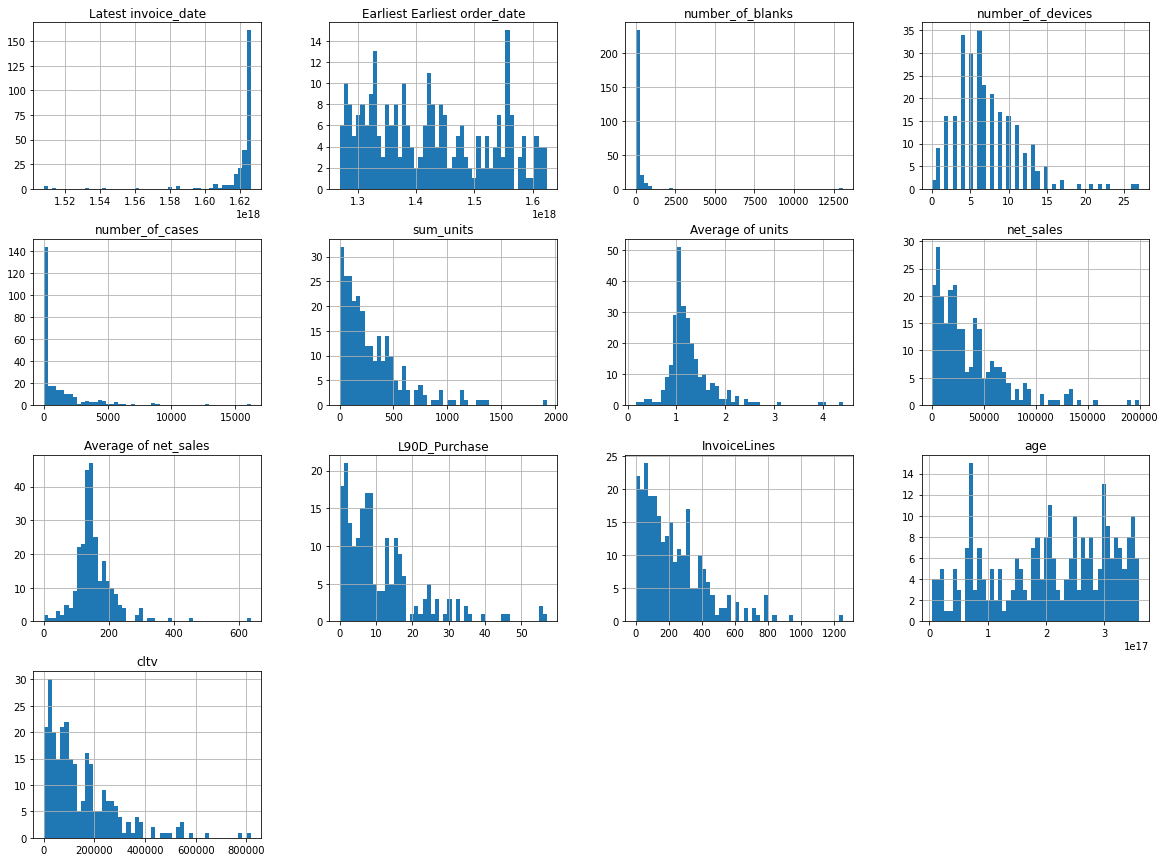

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
ag.hist(bins=50, figsize=(20,15))
plt.show()

In [39]:
corr_matrix=ag.corr()

In [40]:
corr_matrix["L90D_Purchase"].sort_values(ascending=False)

L90D_Purchase                   1.000000
cltv                            0.549367
net_sales                       0.549320
sum_units                       0.542723
InvoiceLines                    0.449688
Average of units                0.339295
Average of net_sales            0.322458
number_of_blanks                0.315108
number_of_cases                 0.242526
number_of_devices               0.198676
Latest invoice_date             0.168894
Earliest Earliest order_date    0.022589
age                            -0.022589
Name: L90D_Purchase, dtype: float64

array([[<AxesSubplot:xlabel='L90D_Purchase', ylabel='L90D_Purchase'>,
        <AxesSubplot:xlabel='cltv', ylabel='L90D_Purchase'>,
        <AxesSubplot:xlabel='Average of units', ylabel='L90D_Purchase'>],
       [<AxesSubplot:xlabel='L90D_Purchase', ylabel='cltv'>,
        <AxesSubplot:xlabel='cltv', ylabel='cltv'>,
        <AxesSubplot:xlabel='Average of units', ylabel='cltv'>],
       [<AxesSubplot:xlabel='L90D_Purchase', ylabel='Average of units'>,
        <AxesSubplot:xlabel='cltv', ylabel='Average of units'>,
        <AxesSubplot:xlabel='Average of units', ylabel='Average of units'>]],
      dtype=object)

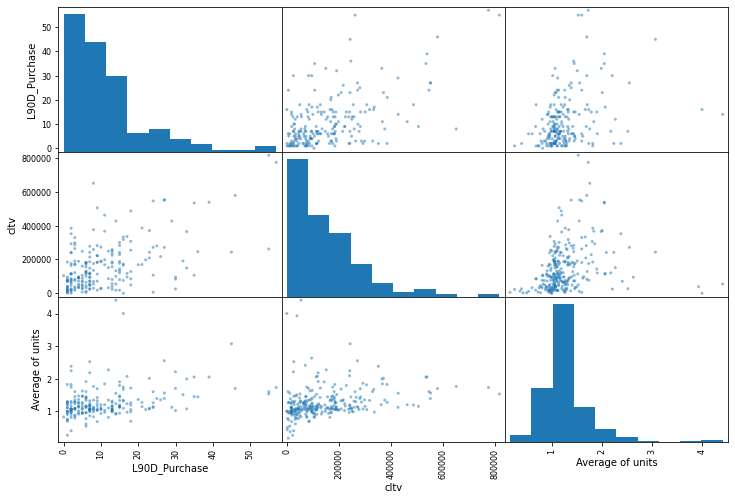

In [71]:
from pandas.plotting import scatter_matrix
attributes = ["L90D_Purchase", "cltv", "Average of units"]
scatter_matrix(ag[attributes], figsize=(12,8))

In [42]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
ag_num = ag.drop("name", axis=1)
imputer.fit(ag_num)

SimpleImputer(strategy='median')

array([[<AxesSubplot:xlabel='L90D_Purchase', ylabel='L90D_Purchase'>,
        <AxesSubplot:xlabel='cltv', ylabel='L90D_Purchase'>],
       [<AxesSubplot:xlabel='L90D_Purchase', ylabel='cltv'>,
        <AxesSubplot:xlabel='cltv', ylabel='cltv'>]], dtype=object)

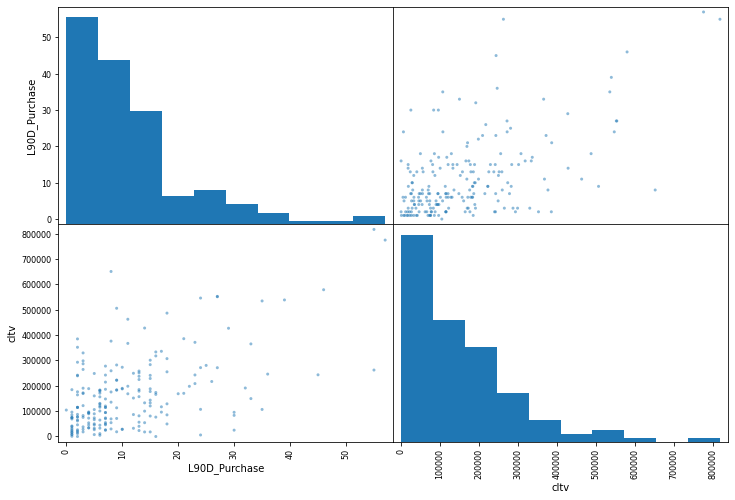

In [44]:
attributes = ["L90D_Purchase", "cltv"]
scatter_matrix(ag_num[attributes], figsize=(12,8))

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(ag, test_size=0.2, random_state=42)

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attrib_adder', CombinedAttributesAdder()),
    ('std_scalar', StandardScaler()),
])
ag_num_tr = num_pipeline.fit_transform(ag_num)

NameError: name 'CombinedAttributesAdder' is not defined

In [47]:
from sklearn.compose import ColumnTransformer
num_attribs = list(ag_num)
cat_attribs = ["name"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline)
])